# Data Cleaning
Data cleaning will involve these 4 steps:
1. Check duplicate values
2. Check Inconsistencies and fix it (categorical variables will be renamed, while numerical variables require formatting to ensure consistent representation)
3. Check Outliers and fix it
4. Missing data
5. Perform Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/movie_classification.csv", header=0)
display(df.head())
display(df.info())

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

None

## 1. Check duplicate values 

In [3]:
def found_duplicates(df: pd.DataFrame) -> None:
    sum_duplicate = df.duplicated().sum()
    print(f"There are {sum_duplicate} duplicate data") if sum_duplicate > 0 else print("No Duplicates") 

found_duplicates(df)

No Duplicates


## 2. Check Inconsistencies

In [4]:
# categorical variable
categorical_feature = df.select_dtypes(include=['object']).columns
for f in categorical_feature:
    print(df.loc[:, f].value_counts())

3D_available
YES    279
NO     227
Name: count, dtype: int64
Genre
Thriller    183
Comedy      155
Drama        97
Action       71
Name: count, dtype: int64


In [5]:
# numerical variable
numerical_feature = df.select_dtypes(include=['int64', 'float64']).columns
df.loc[:, numerical_feature].describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


## 3. Check Outliers
Check outliers using BoxPlot

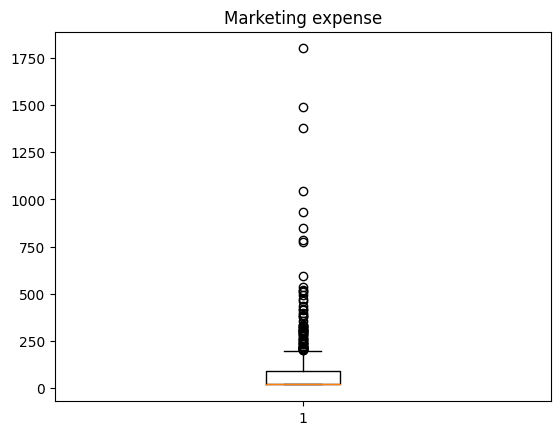

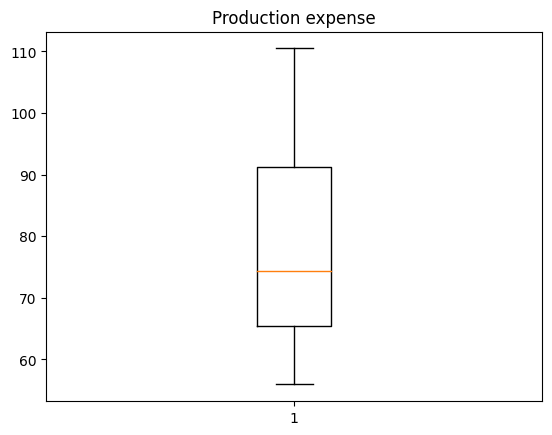

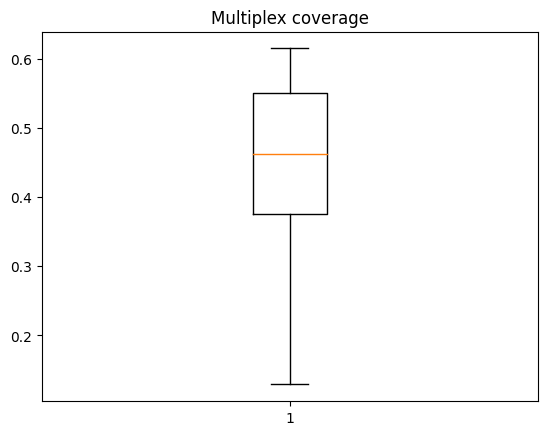

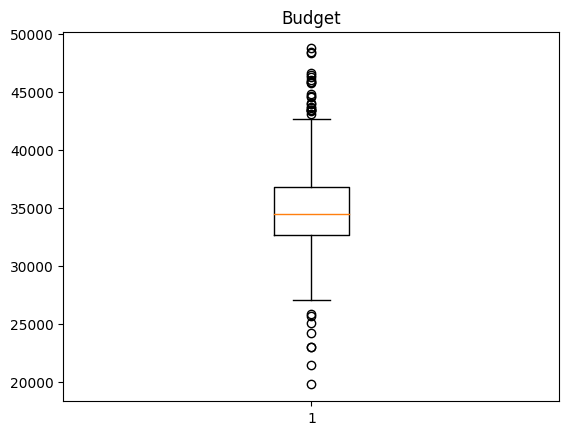

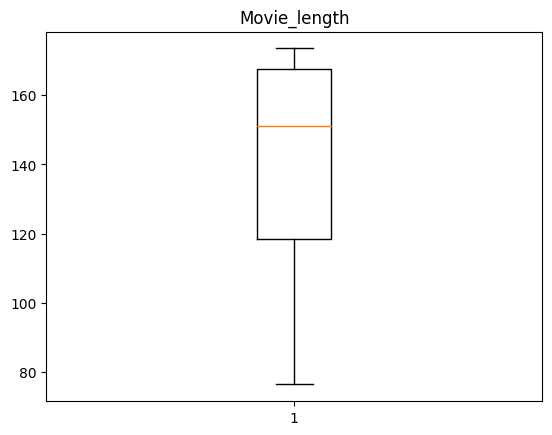

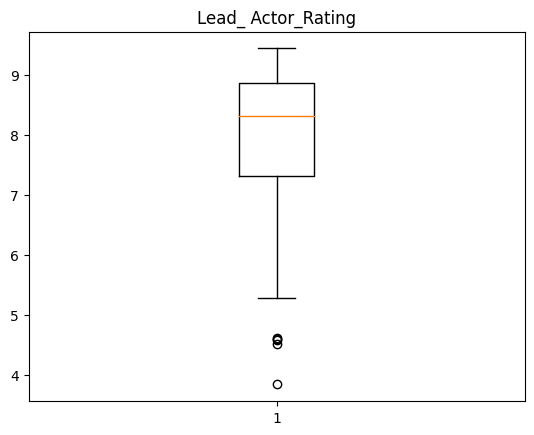

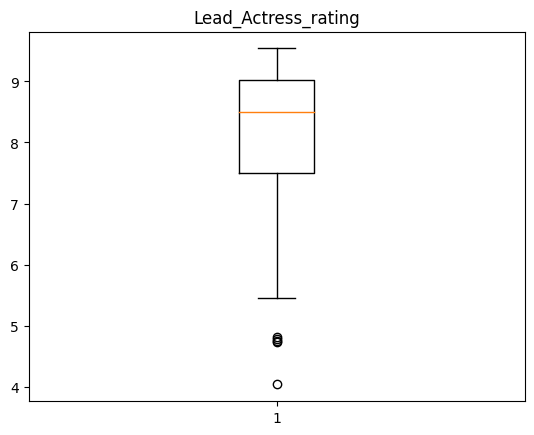

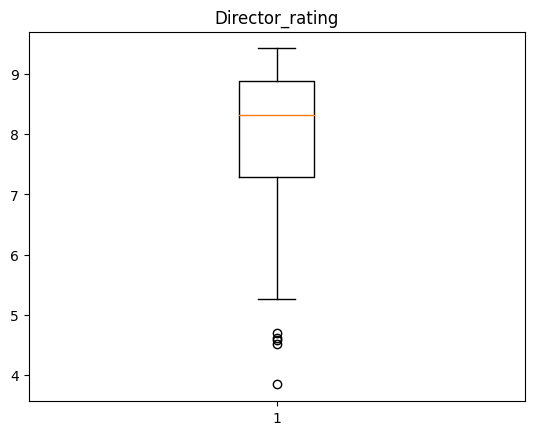

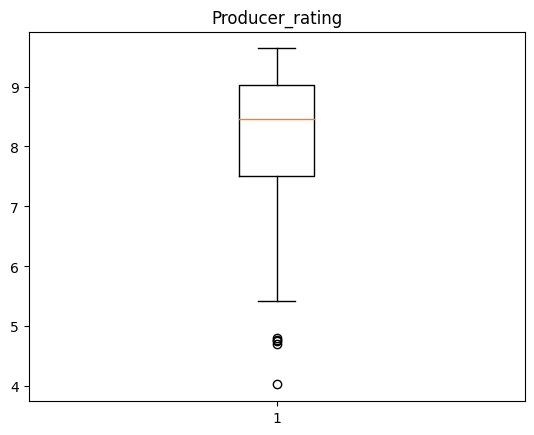

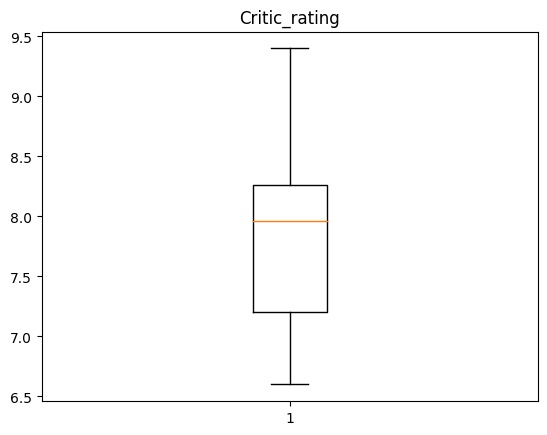

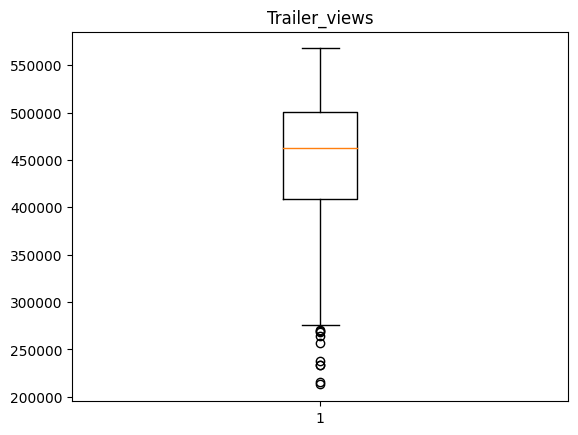

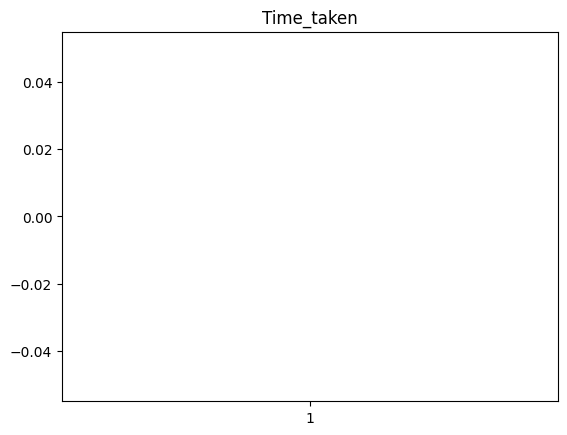

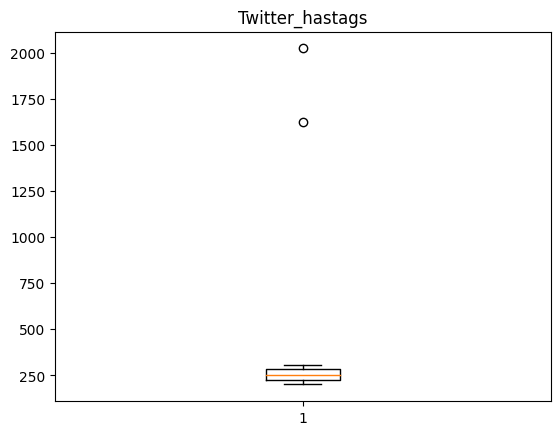

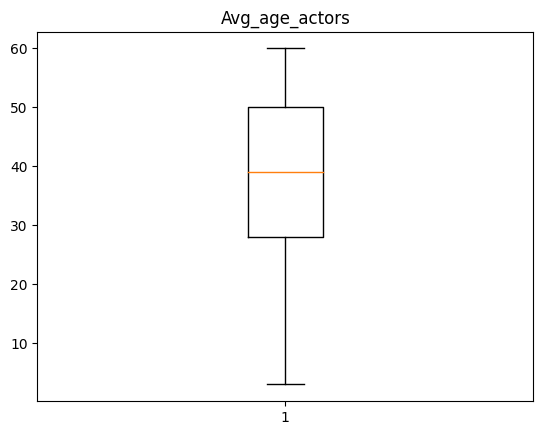

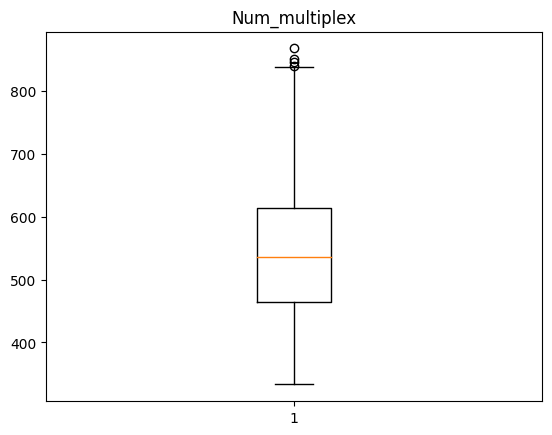

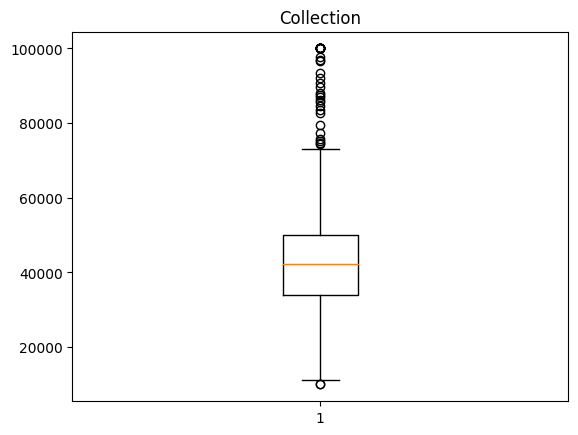

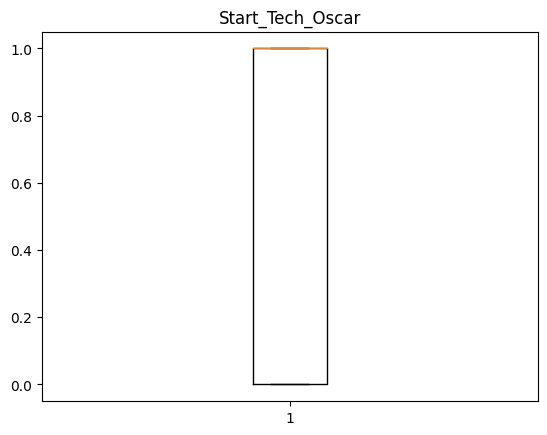

In [6]:
for f in numerical_feature:
    plt.title(f)
    plt.boxplot(df.loc[:, f])
    plt.show()

There exists outliers inside some columns. Let's take a look very closely. There are multiple of ways such as using using IQR, and standard deviation.

In [7]:
# IRQ = 75% percentile - 25% percentile
for f in numerical_feature:
    IQR = df.loc[:, f].quantile(0.75) - df.loc[:, f].quantile(0.25)
    lower_bound = df.loc[:, f].quantile(0.25) - 1.5 * IQR # 25th percentile - 1.5 * IQR
    upper_bound = df.loc[:, f].quantile(0.75) + 1.5 * IQR # 75th percentile + 1.5 * IQR
    if df[(df[f] < lower_bound) | (df[f] > upper_bound)][f].describe()['count'] > 0:
        print(f"Outlier existed inside {f} column. Lower bound : {lower_bound} and upper bound: {upper_bound}")
        display(df[(df[f] < lower_bound) | (df[f] > upper_bound)][f].describe())

Outlier existed inside Marketing expense column. Lower bound : -86.210225 and upper bound: 201.392775


count      66.000000
mean      414.294812
std       310.810093
min       203.740400
25%       241.851500
50%       306.674000
75%       431.167500
max      1799.524000
Name: Marketing expense, dtype: float64

Outlier existed inside Budget column. Lower bound : 26544.567500000005 and upper bound: 42942.92749999999


count       30.000000
mean     39443.462667
std       9939.197898
min      19781.355000
25%      30165.038750
50%      43878.945000
75%      45907.908750
max      48772.900000
Name: Budget, dtype: float64

Outlier existed inside Lead_ Actor_Rating column. Lower bound : 4.993125 and upper bound: 11.188125


count    5.000000
mean     4.429000
std      0.331745
min      3.840000
25%      4.510000
50%      4.585000
75%      4.590000
max      4.620000
Name: Lead_ Actor_Rating, dtype: float64

Outlier existed inside Lead_Actress_rating column. Lower bound : 5.214375000000001 and upper bound: 11.319374999999997


count    5.000000
mean     4.622000
std      0.329917
min      4.035000
25%      4.725000
50%      4.750000
75%      4.785000
max      4.815000
Name: Lead_Actress_rating, dtype: float64

Outlier existed inside Director_rating column. Lower bound : 4.915000000000001 and upper bound: 11.264999999999999


count    5.000000
mean     4.448000
std      0.345843
min      3.840000
25%      4.515000
50%      4.575000
75%      4.620000
max      4.690000
Name: Director_rating, dtype: float64

Outlier existed inside Producer_rating column. Lower bound : 5.223750000000002 and upper bound: 11.313749999999999


count    5.000000
mean     4.612000
std      0.327235
min      4.030000
25%      4.705000
50%      4.750000
75%      4.775000
max      4.800000
Name: Producer_rating, dtype: float64

Outlier existed inside Trailer_views column. Lower bound : 272448.75 and upper bound: 636926.75


count        10.000000
mean     246231.000000
std       22422.553413
min      212912.000000
25%      233255.000000
50%      247307.000000
75%      267001.750000
max      270691.000000
Name: Trailer_views, dtype: float64

Outlier existed inside Time_taken column. Lower bound : 57.91500000000005 and upper bound: 256.275


count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Time_taken, dtype: float64

Outlier existed inside Twitter_hastags column. Lower bound : 134.36599999999999 and upper bound: 372.846


count       2.000000
mean     1822.400000
std       282.842712
min      1622.400000
25%      1722.400000
50%      1822.400000
75%      1922.400000
max      2022.400000
Name: Twitter_hastags, dtype: float64

Outlier existed inside Num_multiplex column. Lower bound : 240.375 and upper bound: 839.375


count      4.000000
mean     851.250000
std       12.038134
min      840.000000
25%      844.500000
50%      848.500000
75%      855.250000
max      868.000000
Name: Num_multiplex, dtype: float64

Outlier existed inside Collection column. Lower bound : 10125.0 and upper bound: 73925.0


count        39.000000
mean      87666.666667
std       20327.908393
min       10000.000000
25%       84000.000000
50%       93400.000000
75%      100000.000000
max      100000.000000
Name: Collection, dtype: float64

Since we have not so many data we can just leave it as it is. But there's an odd column which is `Time_taken` column, it can't be 0 because it is not logical.

In [8]:
df.loc[df['Time_taken'] == 0, 'Time_taken'] = np.nan

## 4. Check Missing Data

In [9]:
for f in df.columns:
    if df.loc[:, f].isna().sum():
        print(f"There's an empty value inside {f} column ({df.loc[:, f].isna().sum()} empty values)")

There's an empty value inside Time_taken column (14 empty values)


In [13]:
# impute missing data and save it
df.to_csv("../data/clean_movie_classification.csv", index=False)